In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

## Feature standardization

In [2]:
features = pd.read_csv('features.csv')
features.loc[:,'contrast_fit']=np.log10(features.contrast/np.median(features.contrast))
features.loc[:,'N50_fit'] = np.log10(1+features['N50'])
features.loc[:,'sum_fit']=np.log10(features['sum']/np.median(features['sum']))

# Model creation and fitting

In [3]:
model = IsolationForest()
labels=model.fit_predict(features[['N50_fit','contrast_fit','sum_fit']])
features['poor_quality_flag']=labels
features['score']=model.score_samples(features[['N50_fit','contrast_fit','sum_fit']])

print("Percentage of poor-quality images: {:0.2f}".format(100*np.sum((labels<0))/len(labels)))

Percentage of poor-quality images: 23.15


# Results: projection of outlier classification on 2D feature subspaces

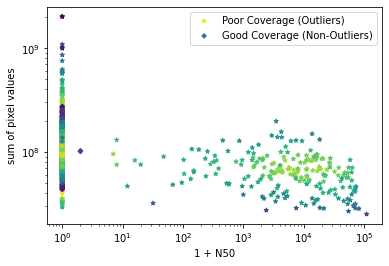

In [4]:
plt.figure()
sel = (features['poor_quality_flag']==-1.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],c=features['score'][sel],\
            marker='*',s=20,label='Poor Coverage (Outliers)')
sel = (features['poor_quality_flag']==1.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],c=features['score'][sel],\
            marker='D',s=10,label='Good Coverage (Non-Outliers)')
plt.xlabel("1 + N50")
plt.ylabel("sum of pixel values")
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

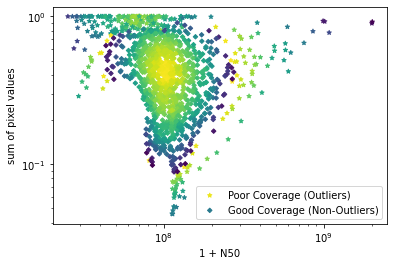

In [5]:
plt.figure()
sel = (features['poor_quality_flag']==-1.)
plt.scatter(features['sum'][sel],features['contrast'][sel],c=features['score'][sel],\
            marker='*',s=20,label='Poor Coverage (Outliers)')
sel = (features['poor_quality_flag']==1.)
plt.scatter(features['sum'][sel],features['contrast'][sel],c=features['score'][sel],\
            marker='D',s=10,label='Good Coverage (Non-Outliers)')
plt.xlabel("1 + N50")
plt.ylabel("sum of pixel values")
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

# Results: outliers in full 3D feature space

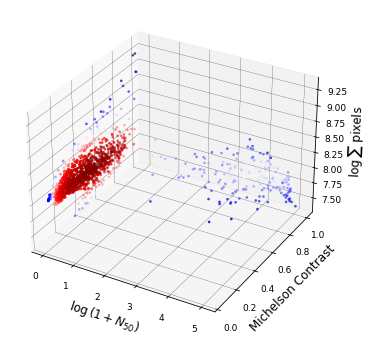

In [6]:
%matplotlib inline
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['font.family'] = 'sans-serif'
rcParams['grid.color'] = 'k'
rcParams['grid.linewidth'] = 0.2
my_locator = MaxNLocator(6)


fig = plt.figure(figsize=(7,6)) 
ax = plt.axes(projection='3d')
sc=ax.scatter3D(np.log10(1+features['N50']), features['contrast'], np.log10(features['sum']),s=3, c=features.score, cmap='seismic')
ax.set_xlabel(r"$\log\left(1+N_{\rm 50}\right)$")
ax.set_ylabel("Michelson Contrast")
ax.set_zlabel(r"$\log \sum$ pixels")
plt.savefig('./figures/IsolationForestResult3D.pdf')
plt.show()

## Isolation Forest -- discovering new classes of poor-quality images

In [10]:
features.nlargest(2,'sum')[['image','poor_quality_flag','score','sum']]

,image,poor_quality_flag,score,sum
70,rs930522n00,-1,-0.707771,2.011554e+09
69,rs930521n00,-1,-0.697924,1.999761e+09


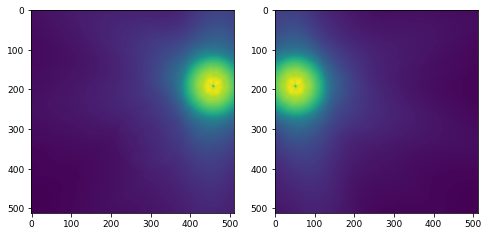

In [8]:
from astropy.io import fits
fig,axs=plt.subplots(ncols=2,figsize=(8,5))
img = fits.open("./exposuremaps/rs930522n00_mex.fits")[0].data
axs[0].imshow(img)
img = fits.open("./exposuremaps/rs930521n00_mex.fits")[0].data
axs[1].imshow(img)
plt.show()

In [9]:
ls

DBSCAN_Hutchens.ipynb   features.csv           prepare_features.py
explore_features.ipynb  figures/               README.md
exposuremaps/           IsolationForest.ipynb  Untitled.ipynb
exposuremaps_png/       kmeans_Hutchens.ipynb
